In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_drug = pd.read_excel("7.1._Drug_seizures_2018-2022.xlsx", engine="openpyxl") # recuperer nos donées dans notre csv
data_drug.head()


,"Drug seizures, 2018-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Region,SubRegion,Country,DrugGroup,DrugSubGroup,DrugName,Reference year,Kilograms,msCode
1,Africa,East Africa,Kenya,Amphetamine-type stimulants (excluding “ecstasy”),Methamphetamine,Methamphetamine,2022,10.84,KEN
2,Africa,East Africa,Kenya,Cannabis-type drugs (excluding synthetic canna...,Cannabis herb (marijuana),Cannabis herb (marijuana),2022,8474.41,KEN
3,Africa,East Africa,Kenya,Cannabis-type drugs (excluding synthetic canna...,Cannabis plants,Cannabis plants,2022,2534.4,KEN
4,Africa,East Africa,Kenya,Cocaine-type,Cocaine,Cocaine hydrochloride,2022,10.99,KEN


In [4]:
data_firearms = pd.read_excel("data_iafq_firearms_trafficking.xlsx", engine="openpyxl") # recuperer nos donées dans notre csv
data_firearms.head()

,UNODC,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,26/08/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
2,ALB,Albania,Europe,Southern Europe,Ammunition seized,Total,Total,na,na,2022,Counts,27806,IAFQ
3,ALB,Albania,Europe,Southern Europe,Arms found,by marking,no marking,na,na,2022,Counts,3,IAFQ
4,ALB,Albania,Europe,Southern Europe,Arms found,by marking,Total,na,na,2022,Counts,18,IAFQ


In [5]:
columns_drug = ["Region", "SubRegion", "Country", "DrugGroup", "DrugSubGroup", "DrugName", "ReferenceYear", "Kilograms", "msCode"]
data_drug.columns = columns_drug

columns_firearms = ["Iso3_code", "Country", "Region", "Subregion", "Indicator", "Dimension", "Category", "Sex", "Age","Year","Unit of measurement","VALUE","Source"]
data_firearms.columns = columns_firearms

# Evolution saisit de drogue

*Saisit de drogue entre les année 2018 à 2022 qui comprends l'enssemble des regions (Amerique, Europe, Asie, Afrique et Oceanie)*

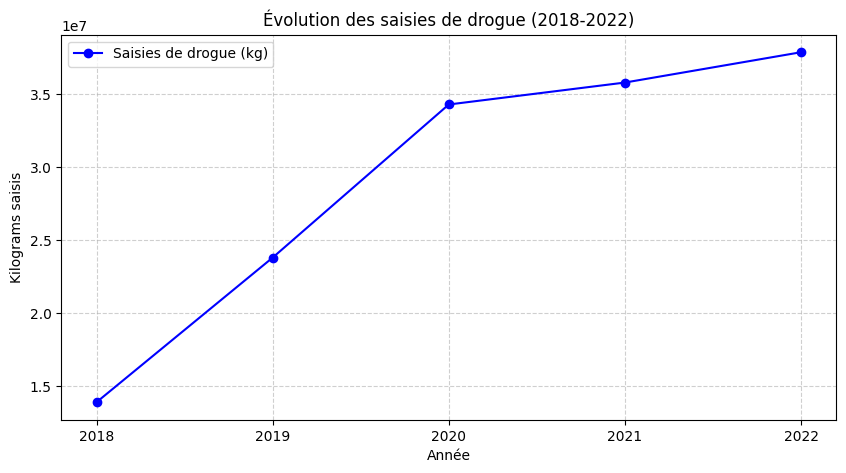

In [6]:
import pandas as pd

# Convertir la colonne 'Kilograms' en numérique (gérer les erreurs éventuelles)
data_drug["Kilograms"] = pd.to_numeric(data_drug["Kilograms"], errors="coerce")
data_drug["ReferenceYear"] = pd.to_numeric(data_drug["ReferenceYear"], errors="coerce")

# Regrouper les données par année
kg_per_year = data_drug.groupby("ReferenceYear")["Kilograms"].sum()

# Tracer le graphique d'évolution
plt.figure(figsize=(10, 5))
plt.plot(kg_per_year.index, kg_per_year.values, marker="o", linestyle="-", color="b", label="Saisies de drogue (kg)")

# Ajouter des titres et labels
plt.title("Évolution des saisies de drogue (2018-2022)")
plt.xlabel("Année")
plt.ylabel("Kilograms saisis")
plt.xticks(kg_per_year.index)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

# Afficher le graphique
plt.show()


# Evolution saisit d'armes

*Saisit d'armes entre les année 2012 à 2022 qui comprends l'enssemble des regions (Amerique, Europe, Asie, Afrique et Oceanie)*

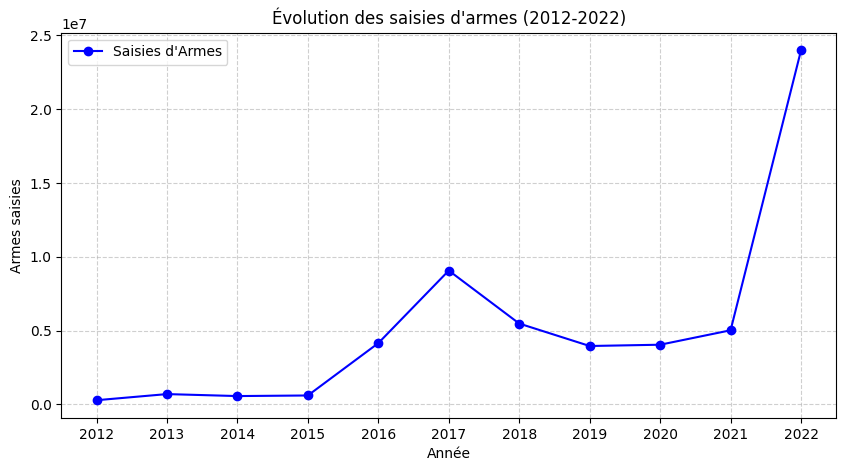

In [15]:

# Convertir les colonnes en numérique
data_firearms["VALUE"] = pd.to_numeric(data_firearms["VALUE"], errors="coerce")
data_firearms["Year"] = pd.to_numeric(data_firearms["Year"], errors="coerce")

# Supprimer les NaN dans 'Year' et convertir en entier
data_firearms = data_firearms.dropna(subset=["Year"])
data_firearms["Year"] = data_firearms["Year"].astype(int)

# Filtrer les années entre 2012 et 2022
data_filtered = data_firearms[(data_firearms["Year"] >= 2012) & (data_firearms["Year"] <= 2022)]

# Regrouper les données par année
kg_per_year = data_filtered.groupby("Year")["VALUE"].sum()

# Tracer le graphique d'évolution
plt.figure(figsize=(10, 5))
plt.plot(kg_per_year.index, kg_per_year.values, marker="o", linestyle="-", color="b", label="Saisies d'Armes")

# Ajouter des titres et labels
plt.title("Évolution des saisies d'armes (2012-2022)")
plt.xlabel("Année")
plt.ylabel("Armes saisies")
plt.xticks(kg_per_year.index)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

# Afficher le graphique
plt.show()


In [16]:
#Ranking on adittionne l'enssemble des valeur selont leurs régions

ranking_region = data_drug.groupby("Region")["Kilograms"].sum()
ranking_region = ranking_region[ranking_region != 0]
ranking_region = ranking_region.sort_values(ascending=False)


ranking_region_fire = data_firearms.groupby("Region")["VALUE"].sum()
ranking_region_fire = ranking_region_fire[ranking_region_fire != 0]
ranking_region_fire = ranking_region_fire.sort_values(ascending=False)

print(ranking_region)
print(ranking_region_fire)


Region
Americas    5.206251e+07
Europe      4.398714e+07
Asia        3.237204e+07
Africa      1.698736e+07
Oceania     3.080453e+05
Name: Kilograms, dtype: float64
Region
Americas    25648556.0
Asia        17341510.0
Europe       7874983.0
Oceania      6306210.0
Africa       1352250.0
Name: VALUE, dtype: float64


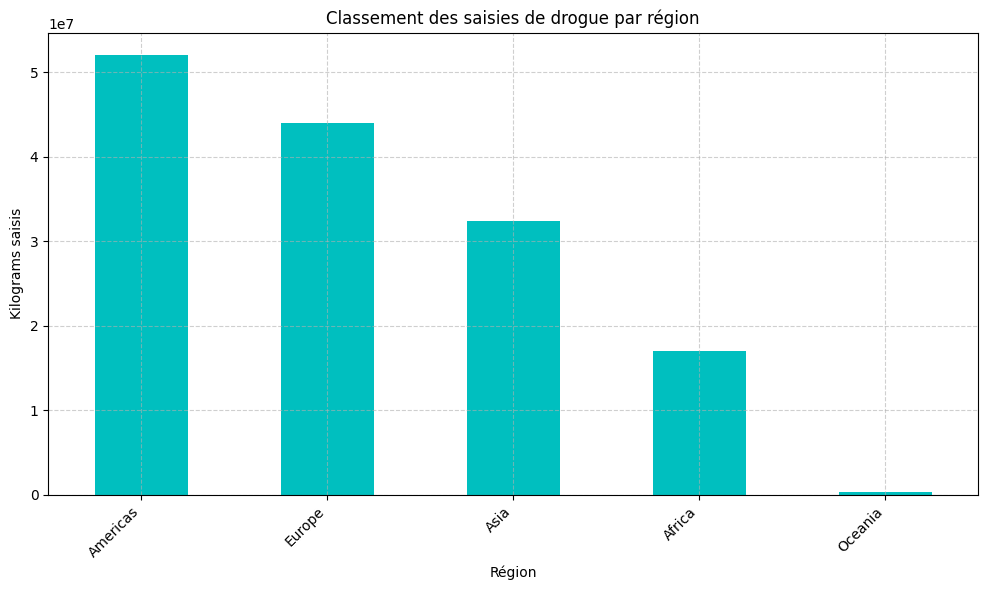

In [9]:
# Tracer le classement
plt.figure(figsize=(12, 6))
ranking_region.plot(kind="bar", color="c")
plt.title("Classement des saisies de drogue par région")
plt.xlabel("Région")
plt.ylabel("Kilograms saisis")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

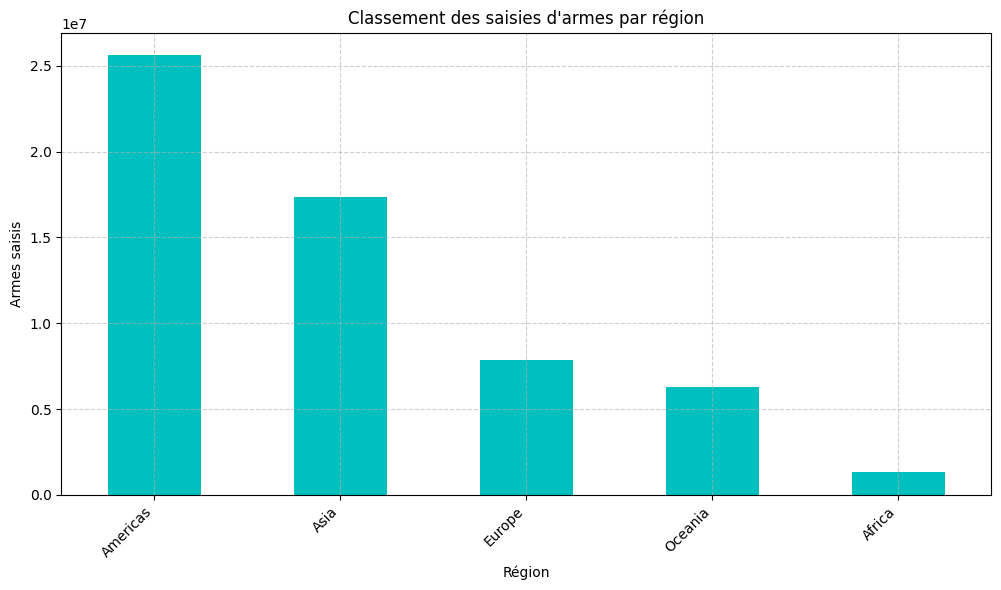

In [10]:
# Tracer le classement
plt.figure(figsize=(12, 6))
ranking_region_fire.plot(kind="bar", color="c")
plt.title("Classement des saisies d'armes par région")
plt.xlabel("Région")
plt.ylabel("Armes saisis")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()